In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Data Pre-processing

In [2]:
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 7890345
Shape: (175341, 45)
-----------------------
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
-----------------------
label
1    119341
0     56000
Name: count, dtype: int64


In [6]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Label Distribution')

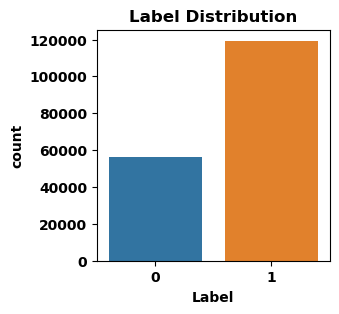

In [7]:
#Attack and Normal distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

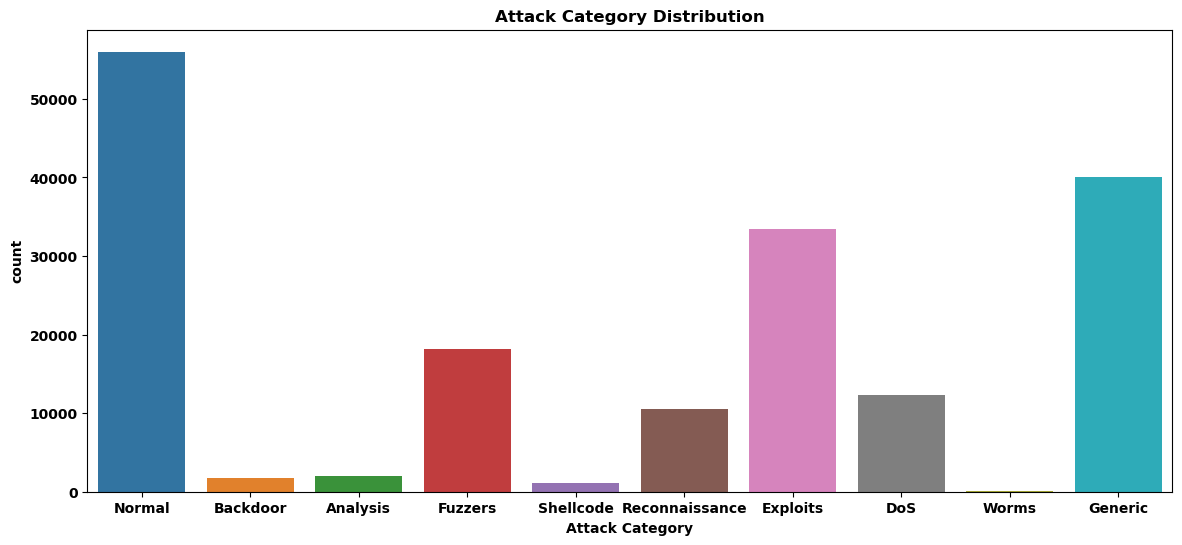

In [8]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [9]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

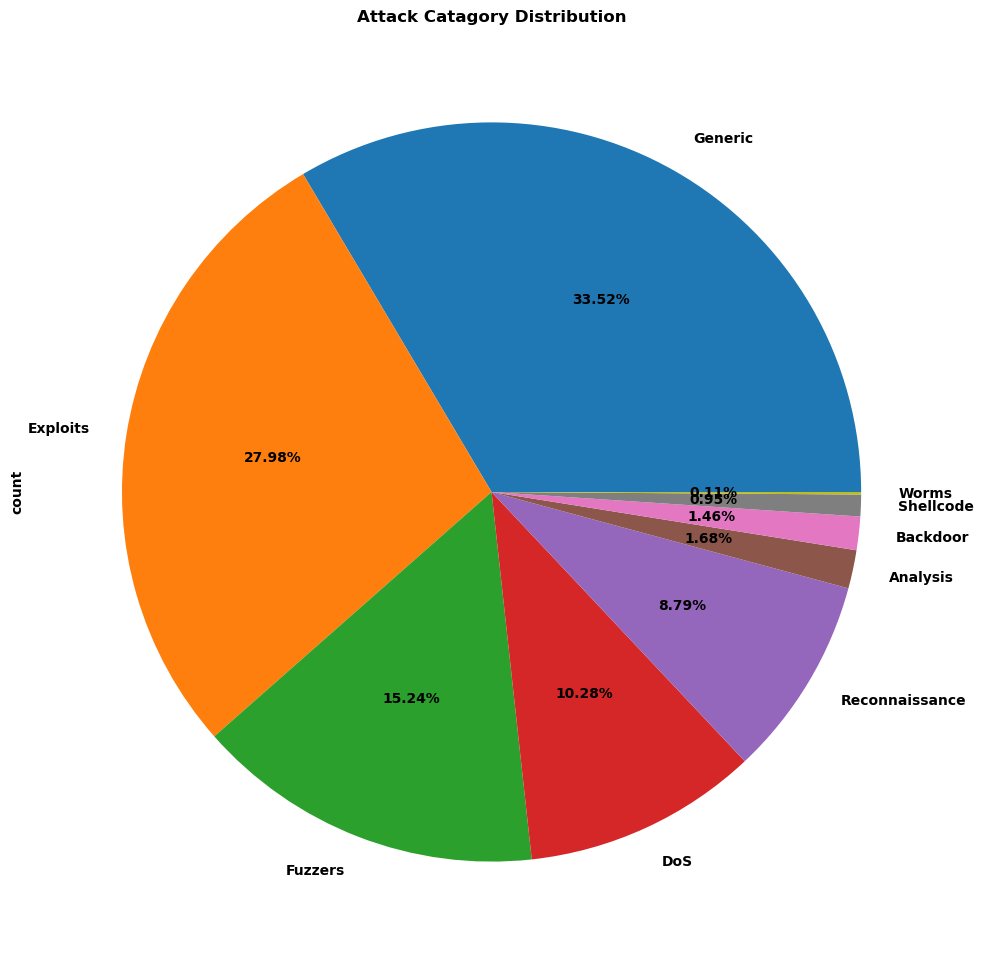

In [11]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_train_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

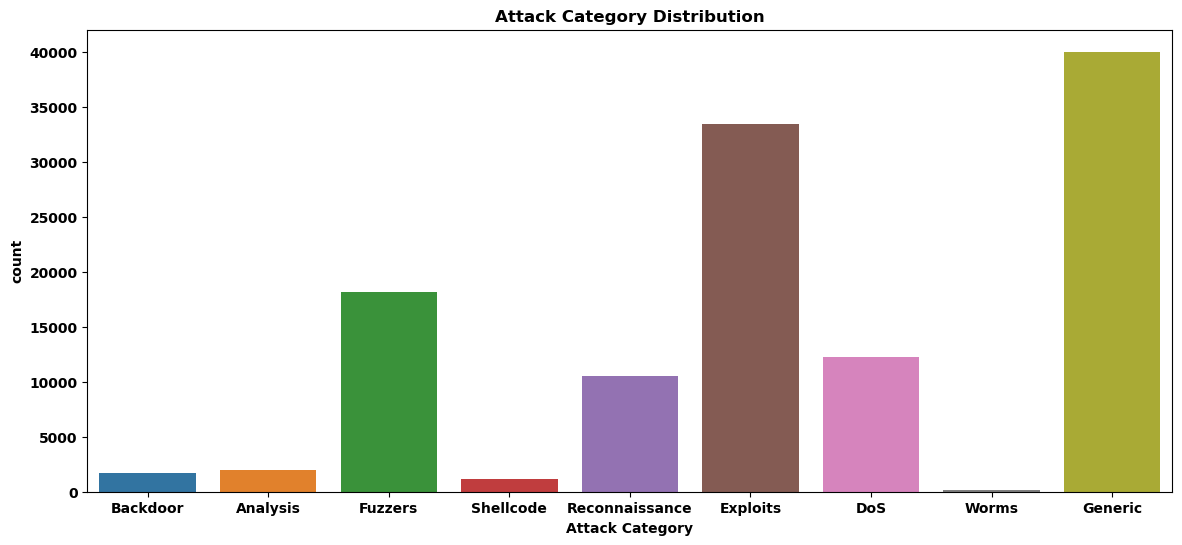

In [12]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Encode Train Data

In [13]:
#Encode attack_cat
le = LabelEncoder()
data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])

#Encode state
data_train_attack['state'] = le.fit_transform(data_train_attack['state'])

#Encode service
data_train_attack['service'] = le.fit_transform(data_train_attack['service'])

#Encode proto
data_train_attack['proto'] = le.fit_transform(data_train_attack['proto'])

data_train_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\2731351650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\2731351650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['state'] = le.fit_transform(data_train_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\2731351650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Encode Test Data

In [14]:
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\230897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\230897011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9804\230897011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

Text(0.5, 1.0, 'Attack Category Distribution')

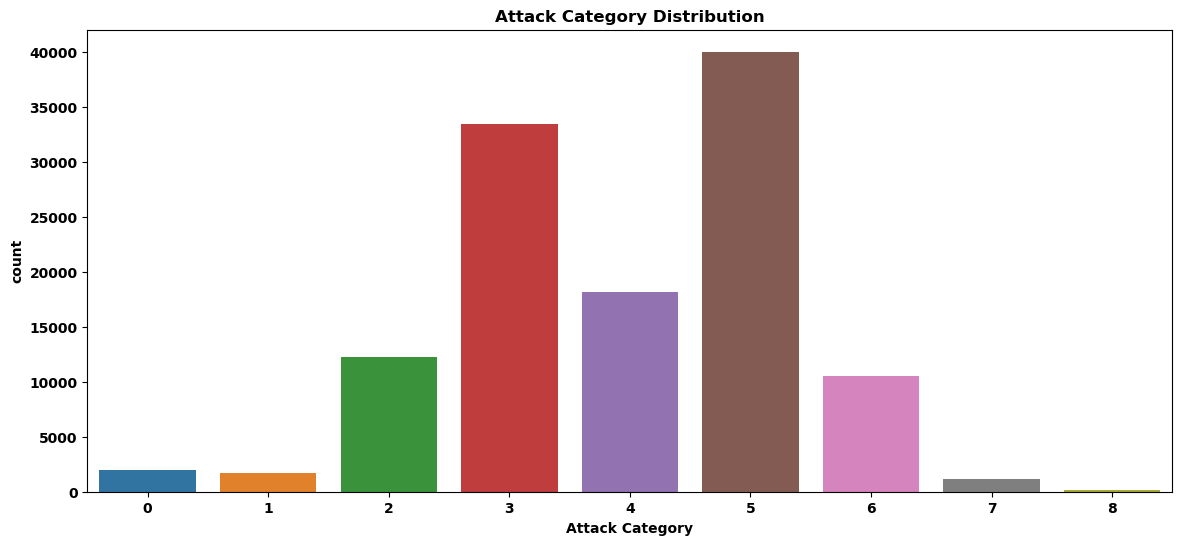

In [15]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Feature Selection

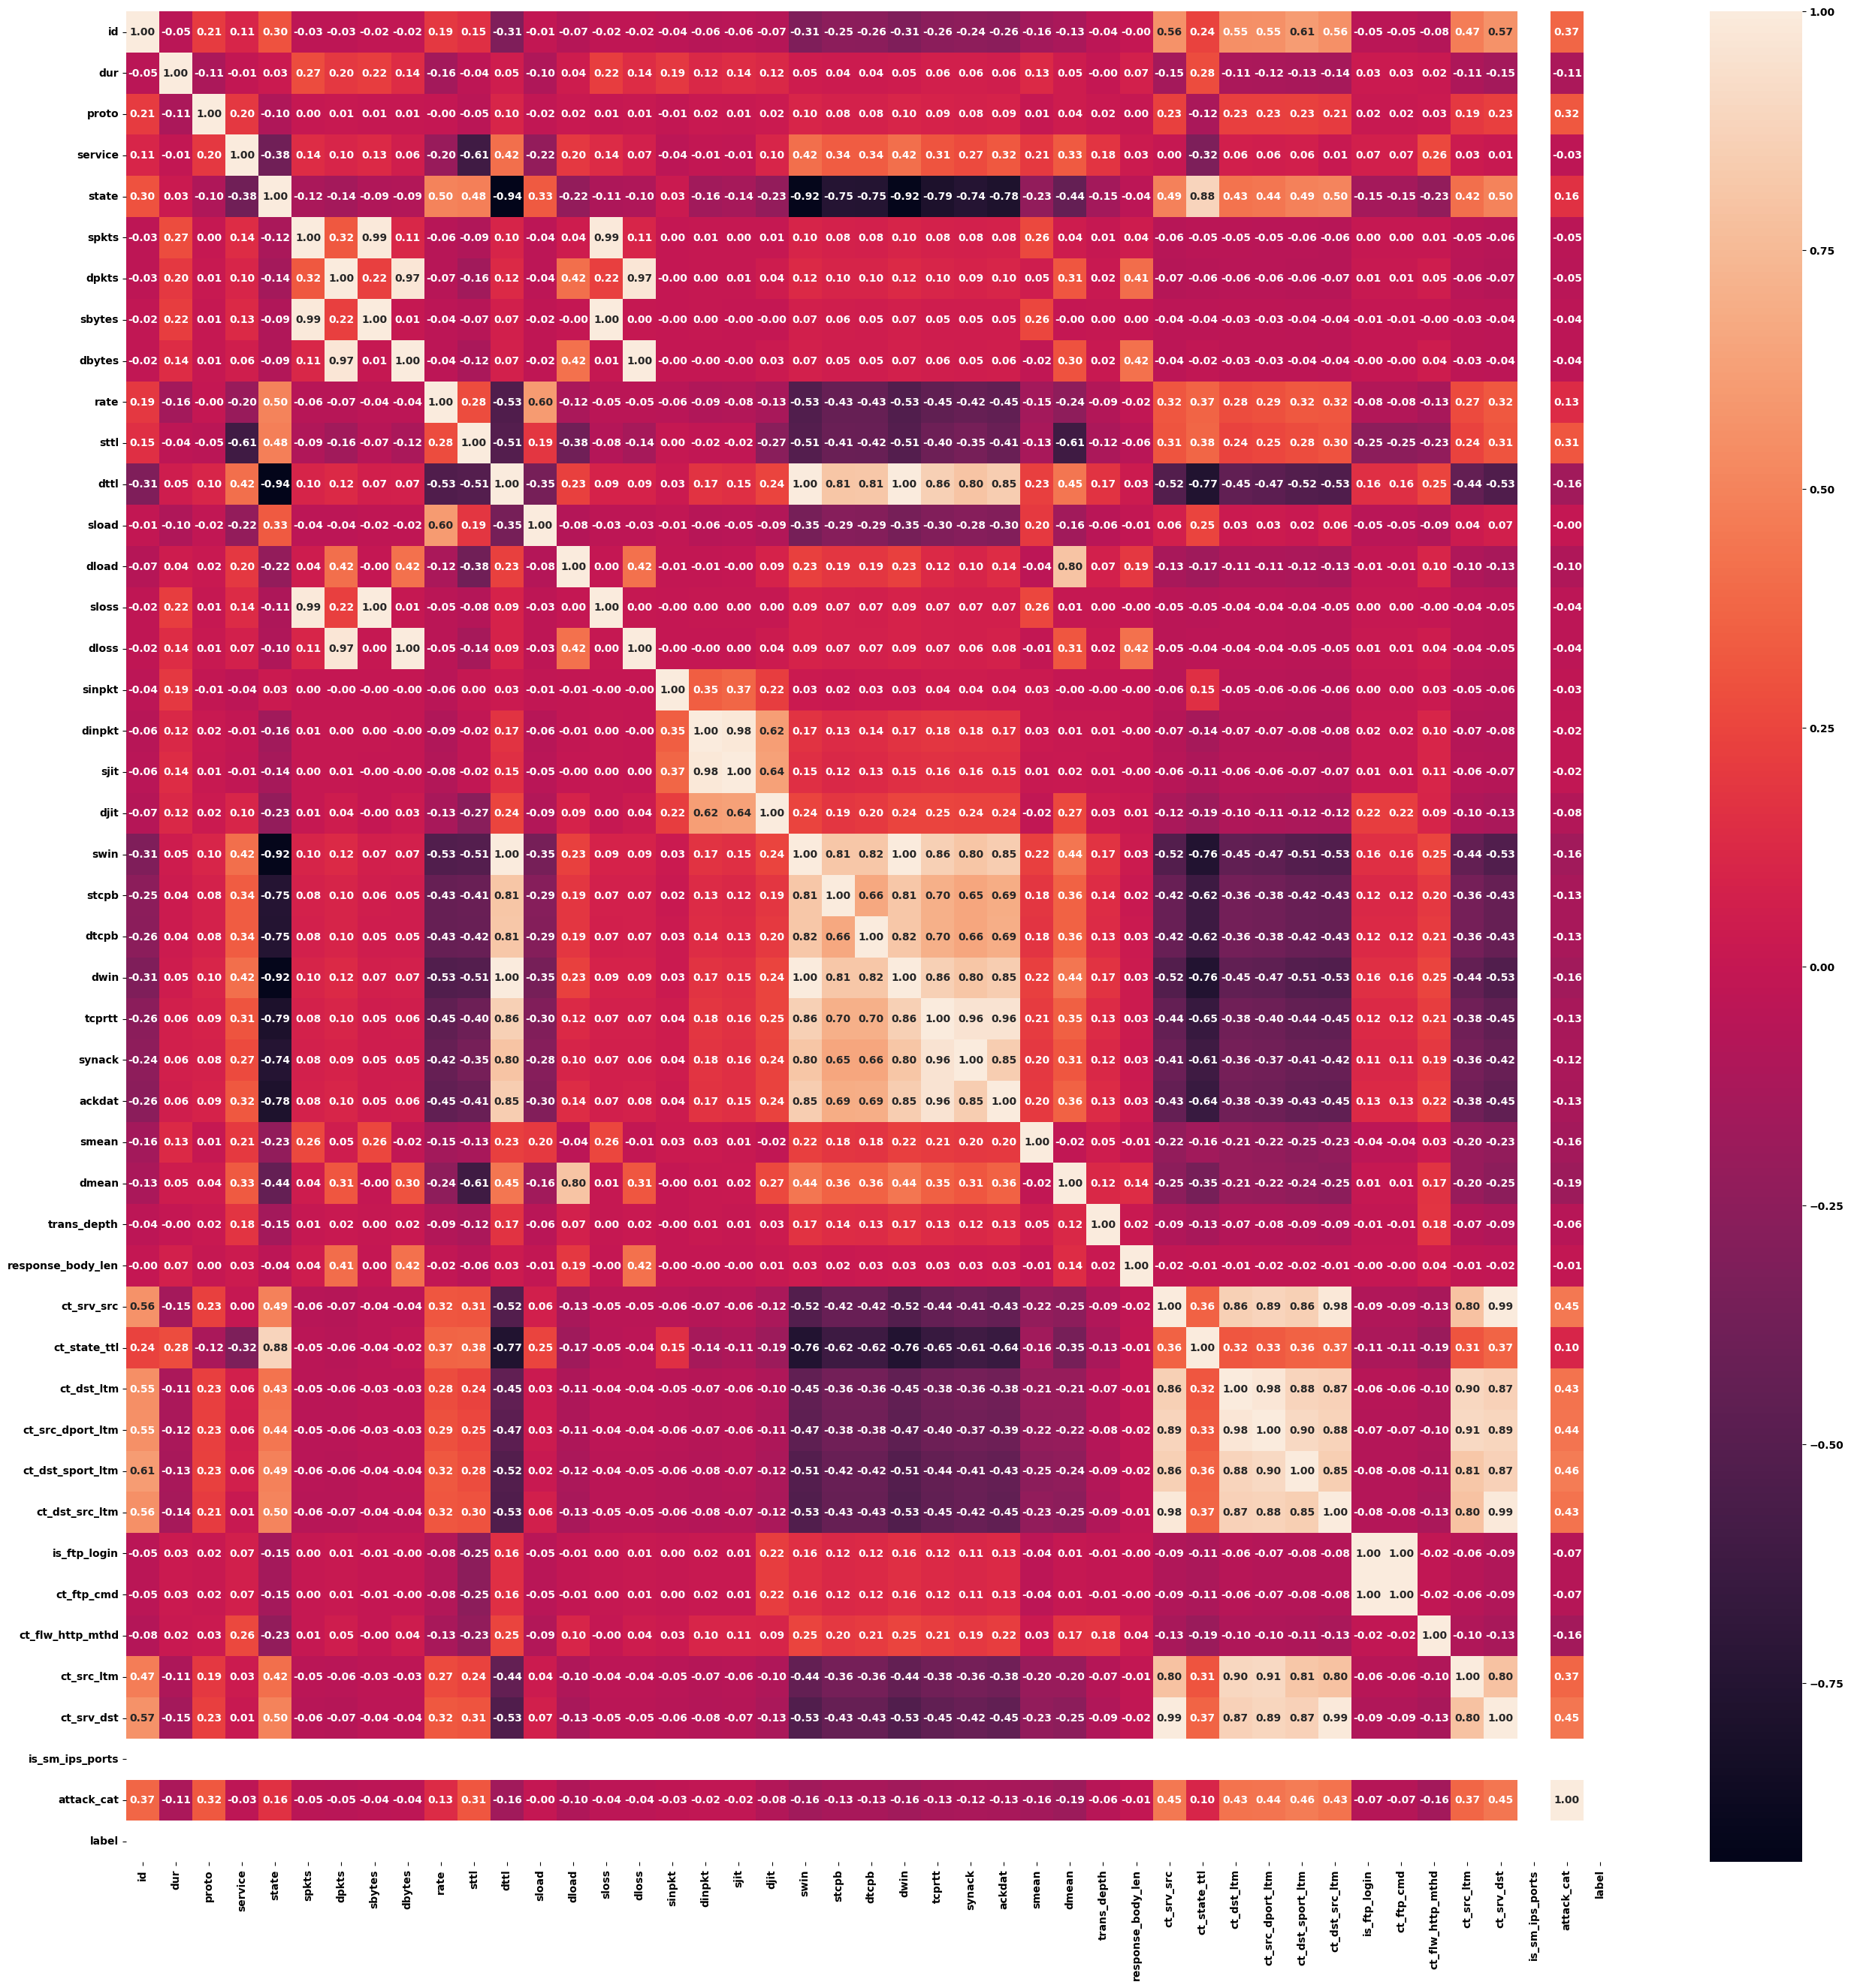

In [16]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#Feature Selection
feature = data_train_attack.drop(['id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'], axis=1)
feature.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login  

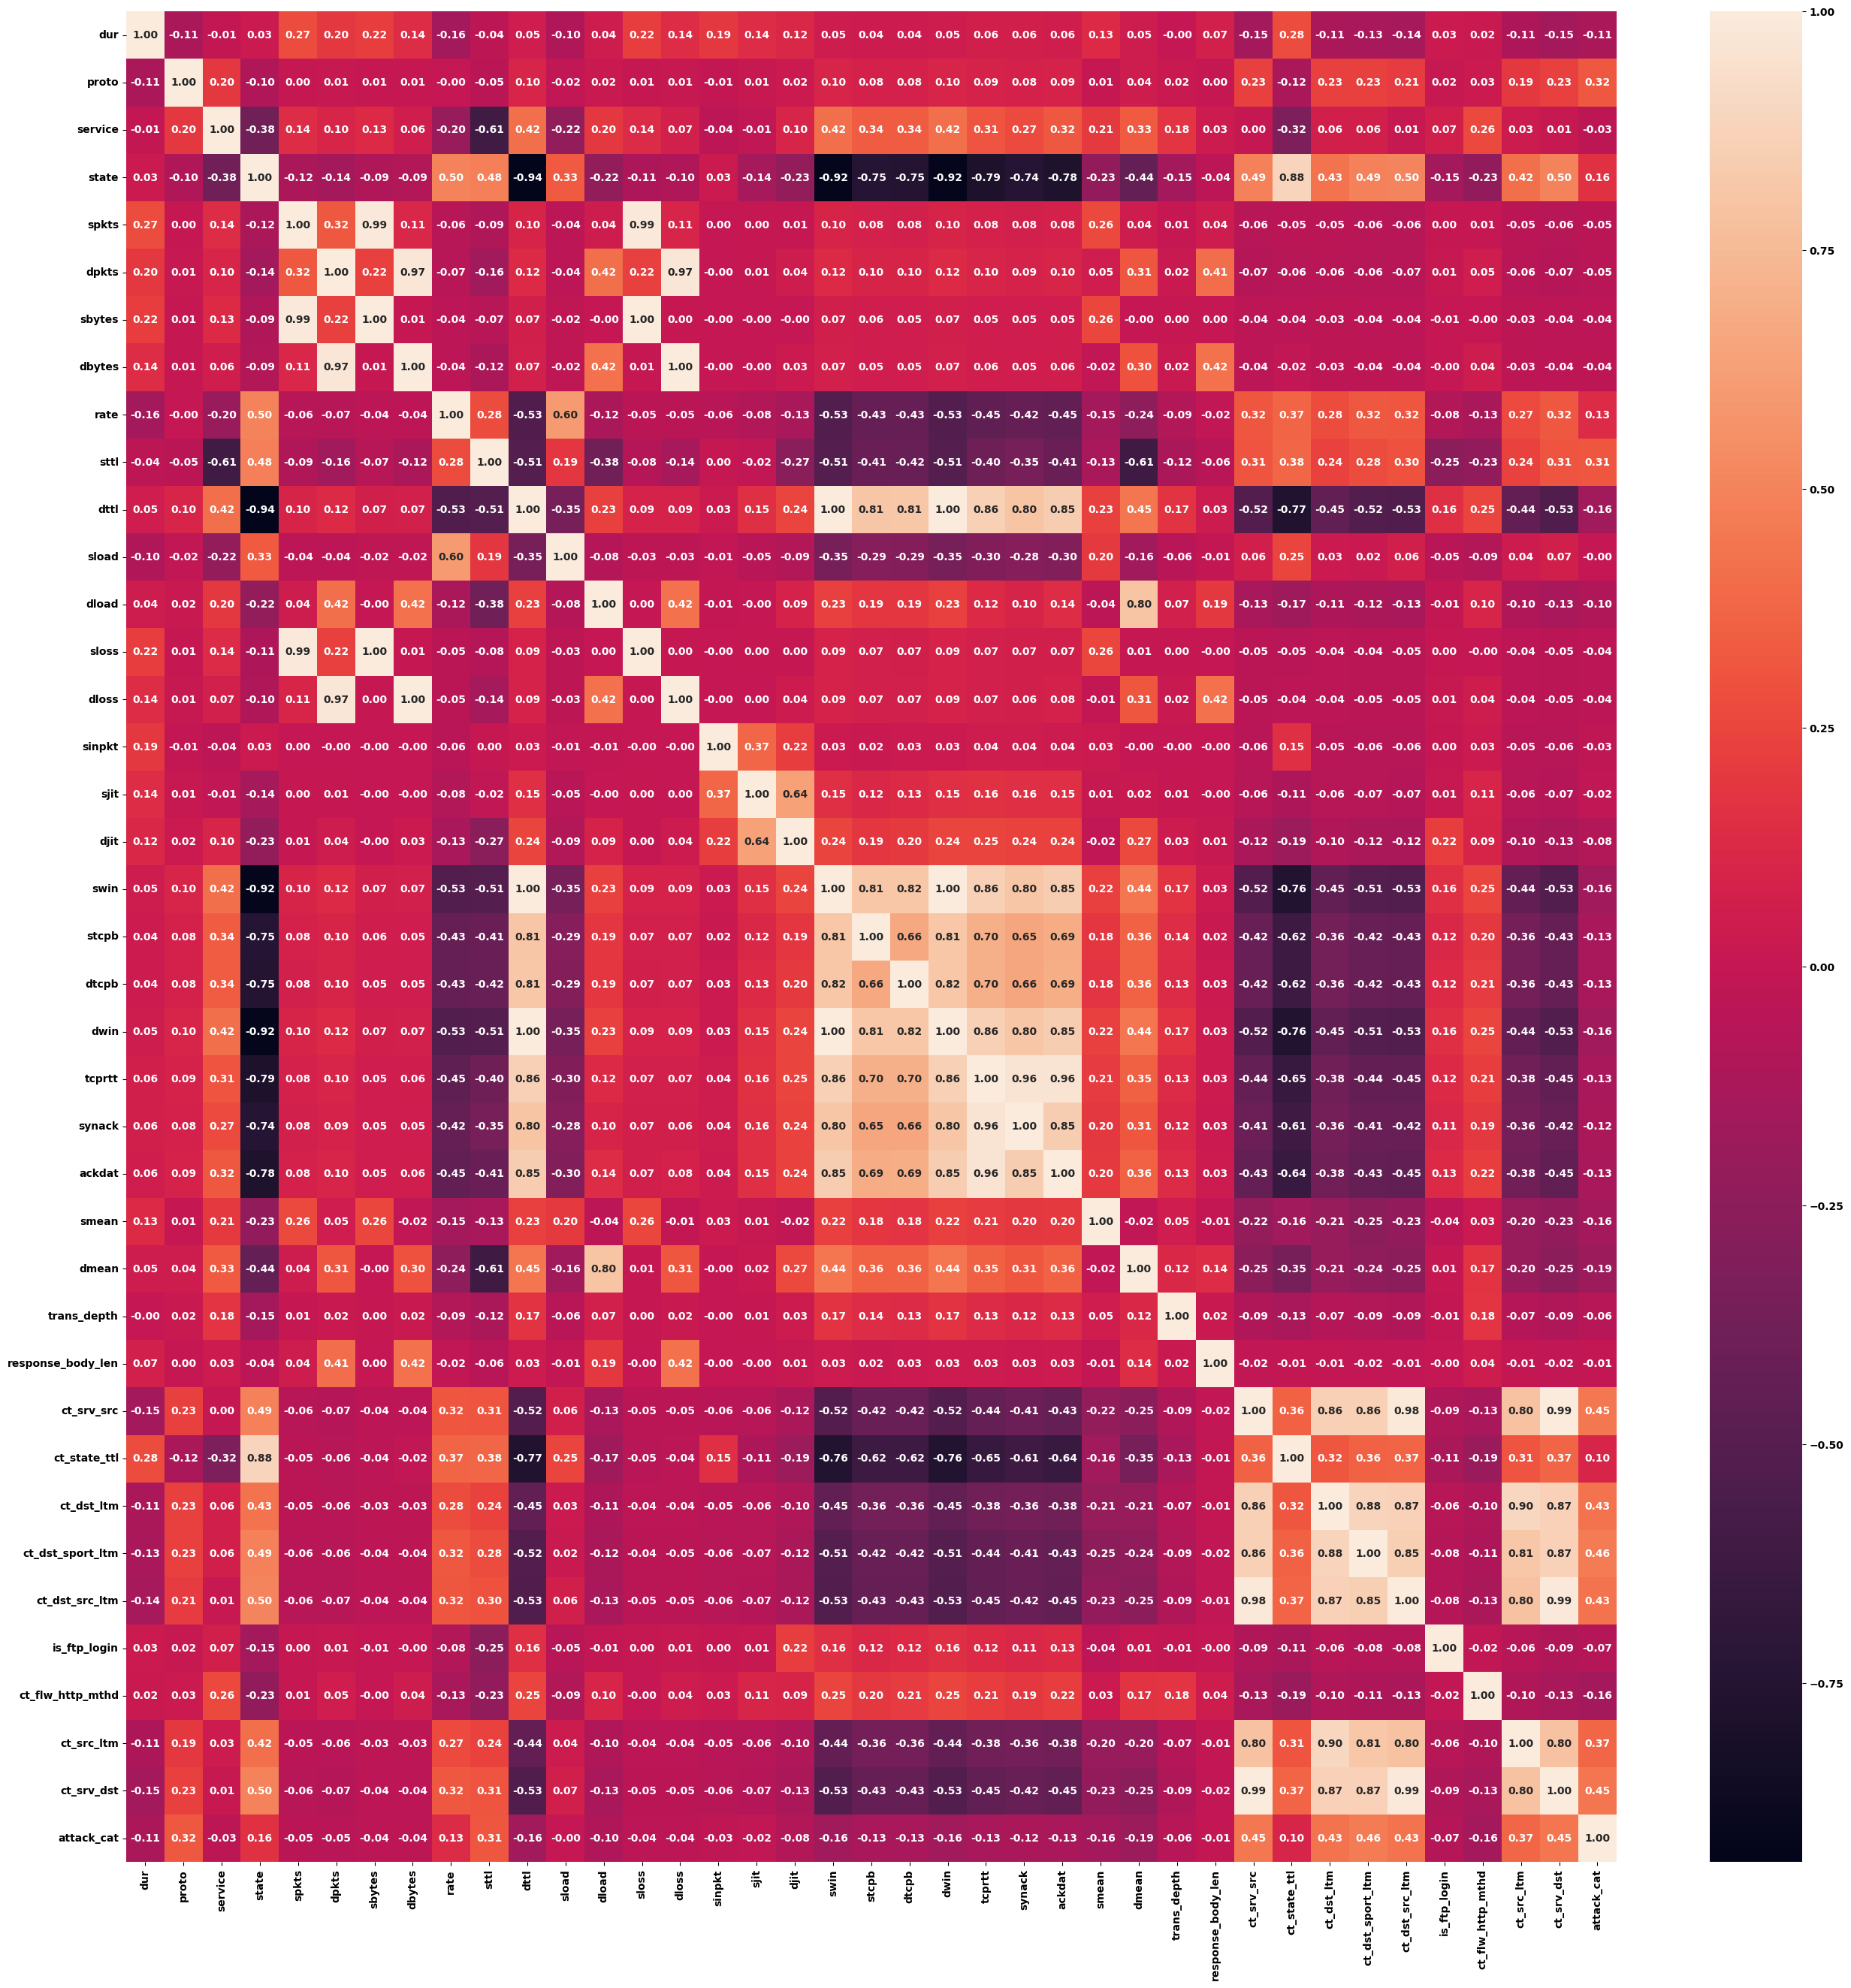

In [18]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(feature.corr(), annot=True, fmt=".2f")
plt.show()

# Model Evaluation

In [19]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
precision = []
recall = []
f1_score = []


#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    precision.append(round(b, 5))
    recall.append(round(c, 5))
    f1_score.append(round(d, 5))

In [24]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.5f}".format(acc_train))
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='macro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on training Data: {:.5f}".format(precision_score_train))
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='macro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on training Data: {:.5f}".format(recall_score_train))
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing f1 score
    f1_score_train = 2 * (precision_score_train * recall_score_train) / (precision_score_train + recall_score_train)
    f1_score_test = 2 * (precision_score_test * recall_score_test) / (precision_score_test + recall_score_test)
    print("F1 score on training Data: {:.5f}".format(f1_score_train))
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, precision_score_test, recall_score_test, f1_score_test)

## Split Data Into Train and Test

In [20]:
#Splitting the dataset into dependent and independent feature
X_train = feature.drop(columns=['attack_cat'])
y_train = feature["attack_cat"]

X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((119341, 38), (119341,), (45332, 38), (45332,))

## Training, Testing, Evaluation

### Decision Tree

In [61]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=12)

#fit the model
destree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [62]:
#predicting
p_train_destree = destree.predict(X_train)
p_test_destree = destree.predict(X_test)

In [63]:
#call report function
model_report(str(destree), y_train, y_test, p_train_destree, p_test_destree)

Model:DecisionTreeClassifier(max_depth=12)

Accuracy on training Data: 0.82470
Accuracy on test Data: 0.77874

Precision on training Data: 0.82463
Precision on test Data: 0.55112

Recall score on training Data: 0.57354
Recall score on test Data: 0.49672

F1 score on training Data: 0.67654
F1 score on test Data: 0.52251

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.09      0.06       677
           1       0.06      0.12      0.08       583
           2       0.49      0.10      0.16      4089
           3       0.61      0.84      0.71     11132
           4       0.88      0.66      0.75      6062
           5       1.00      0.97      0.98     18871
           6       0.93      0.80      0.86      3496
           7       0.41      0.73      0.53       378
           8       0.54      0.16      0.25        44

    accuracy                           0.78     45332
   macro avg       0.55      0.50      0.49     45332
weight

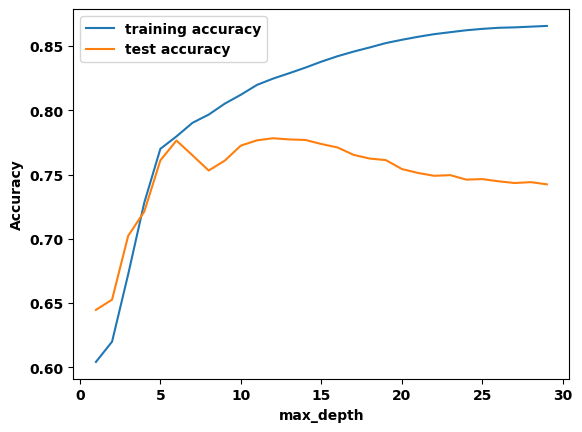

In [26]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_train, y_train))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [64]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=20)

#fit the model
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [65]:
#predicting
p_train_ranfor = ranfor.predict(X_train)
p_test_ranfor = ranfor.predict(X_test)

In [66]:
#call report function
model_report(str(ranfor), y_train, y_test, p_train_ranfor, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=20)

Accuracy on training Data: 0.86595
Accuracy on test Data: 0.76723

Precision on training Data: 0.89408
Precision on test Data: 0.54074

Recall score on training Data: 0.72889
Recall score on test Data: 0.49575

F1 score on training Data: 0.80308
F1 score on test Data: 0.51727

Classification Report
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       677
           1       0.02      0.10      0.03       583
           2       0.49      0.14      0.22      4089
           3       0.68      0.75      0.72     11132
           4       0.78      0.71      0.75      6062
           5       1.00      0.97      0.98     18871
           6       0.85      0.80      0.82      3496
           7       0.40      0.69      0.51       378
           8       0.63      0.27      0.38        44

    accuracy                           0.77     45332
   macro avg       0.54      0.50      0.49     45332
wei

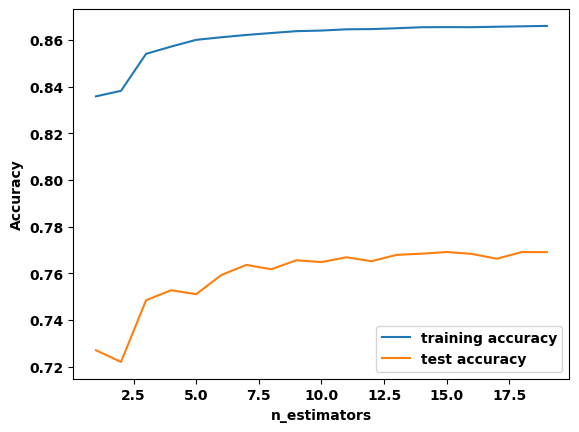

In [30]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try n_estimators from 1 to 20
n_est = range(1, 20)
for n in n_est:
    ranfor_test = RandomForestClassifier(n_estimators=n)

    ranfor_test.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(ranfor_test.score(X_train, y_train))
    #recor generalization accuracy
    test_accuracy.append(ranfor_test.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(n_est, training_accuracy, label="training accuracy")
plt.plot(n_est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

### Gradient Boosting

In [31]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier()

#fit the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [32]:
#predicting
p_train_gbc = gbc.predict(X_train)
p_test_gbc = gbc.predict(X_test)

In [33]:
#call report function
model_report(str(gbc), y_train, y_test, p_train_gbc, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on training Data: 0.81458
Accuracy on test Data: 0.74916

Precision on training Data: 0.81189
Precision on test Data: 0.55407

Recall score on training Data: 0.57043
Recall score on test Data: 0.47886

F1 score on training Data: 0.67008
F1 score on test Data: 0.51373

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.33      0.05      0.08       583
           2       0.66      0.05      0.10      4089
           3       0.77      0.69      0.73     11132
           4       0.90      0.73      0.80      6062
           5       1.00      0.97      0.98     18871
           6       0.28      0.89      0.42      3496
           7       0.40      0.54      0.46       378
           8       0.65      0.39      0.49        44

    accuracy                           0.75     45332
   macro avg       0.55      0.48      0.45     45332
weighted avg  

### XGBoost

In [34]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
#predicting
p_train_xgb = xgb.predict(X_train)
p_test_xgb = xgb.predict(X_test)

In [36]:
#call report function
model_report(str(xgb), y_train, y_test, p_train_xgb, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.84307
Accuracy on test Data: 0.79288

Precision on training Data: 0.87181
Precision on test Data: 0.56679

Recall score on training Data: 0.68788
Recall score on test Data: 0.53997

F1 score on tra

# Result

## Comparison of Models

In [67]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'Precision' : precision,
                       'Recall' : recall,
                       'F1 Score' : f1_score
                       })
result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier(max_depth=11),0.77702,0.54535,0.49251,0.51759
1,RandomForestClassifier(n_estimators=17),0.76829,0.55178,0.49539,0.52206
2,GradientBoostingClassifier(),0.74916,0.55407,0.47886,0.51373
3,"XGBClassifier(base_score=None, booster=None, c...",0.79288,0.56679,0.53997,0.55306
4,DecisionTreeClassifier(max_depth=12),0.77874,0.55112,0.49672,0.52251
5,RandomForestClassifier(n_estimators=20),0.76723,0.54074,0.49575,0.51727


In [68]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['F1 Score'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,"XGBClassifier(base_score=None, booster=None, c...",0.79288,0.56679,0.53997,0.55306
1,DecisionTreeClassifier(max_depth=12),0.77874,0.55112,0.49672,0.52251
2,RandomForestClassifier(n_estimators=17),0.76829,0.55178,0.49539,0.52206
3,DecisionTreeClassifier(max_depth=11),0.77702,0.54535,0.49251,0.51759
4,RandomForestClassifier(n_estimators=20),0.76723,0.54074,0.49575,0.51727
5,GradientBoostingClassifier(),0.74916,0.55407,0.47886,0.51373


## Save to csv file

In [69]:
#save result to csv file
sorted_result.to_csv('encode_imbalanced_unswnb15_result.csv')

## Confusion Matrix

In [40]:
print("Data Train:")
print(data_train_attack['attack_cat'].value_counts())
print('------------------------------------')
print("Data Test:")
print(data_test_attack['attack_cat'].value_counts())

Data Train:
attack_cat
5    40000
3    33393
4    18184
2    12264
6    10491
0     2000
1     1746
7     1133
8      130
Name: count, dtype: int64
------------------------------------
Data Test:
attack_cat
5    18871
3    11132
4     6062
2     4089
6     3496
0      677
1      583
7      378
8       44
Name: count, dtype: int64


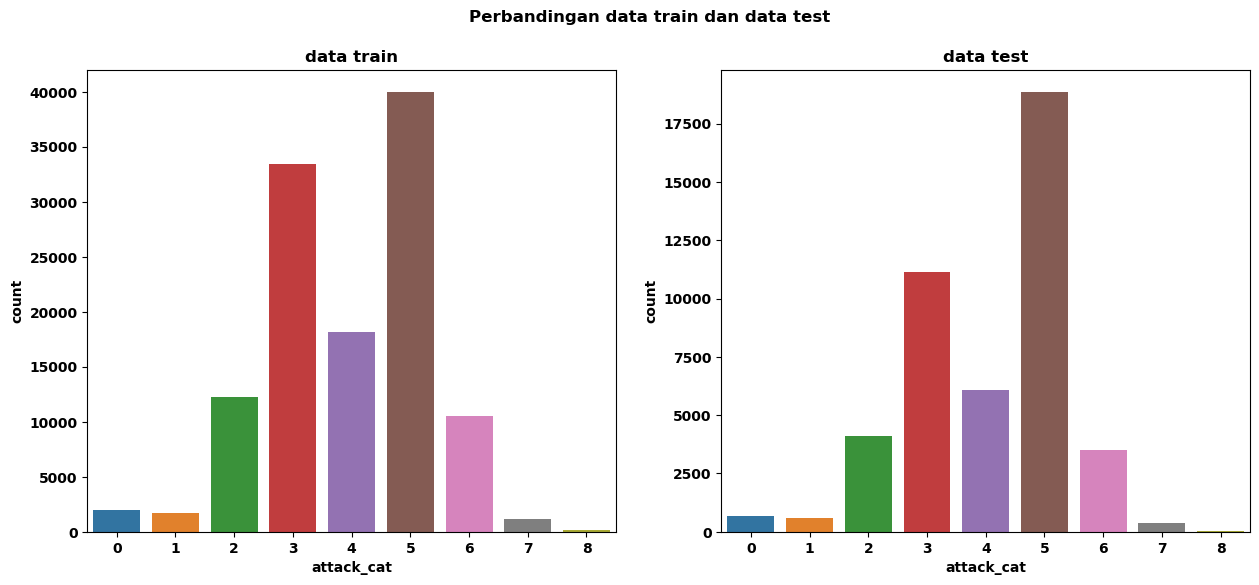

In [41]:
fig, (axes) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Perbandingan data train dan data test')
sns.countplot(data=data_train_attack, x='attack_cat', ax=axes[0])
axes[0].set_title('data train')
sns.countplot(data=data_test_attack, x='attack_cat', ax=axes[1])
axes[1].set_title('data test')
plt.show()

In [42]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [43]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [70]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

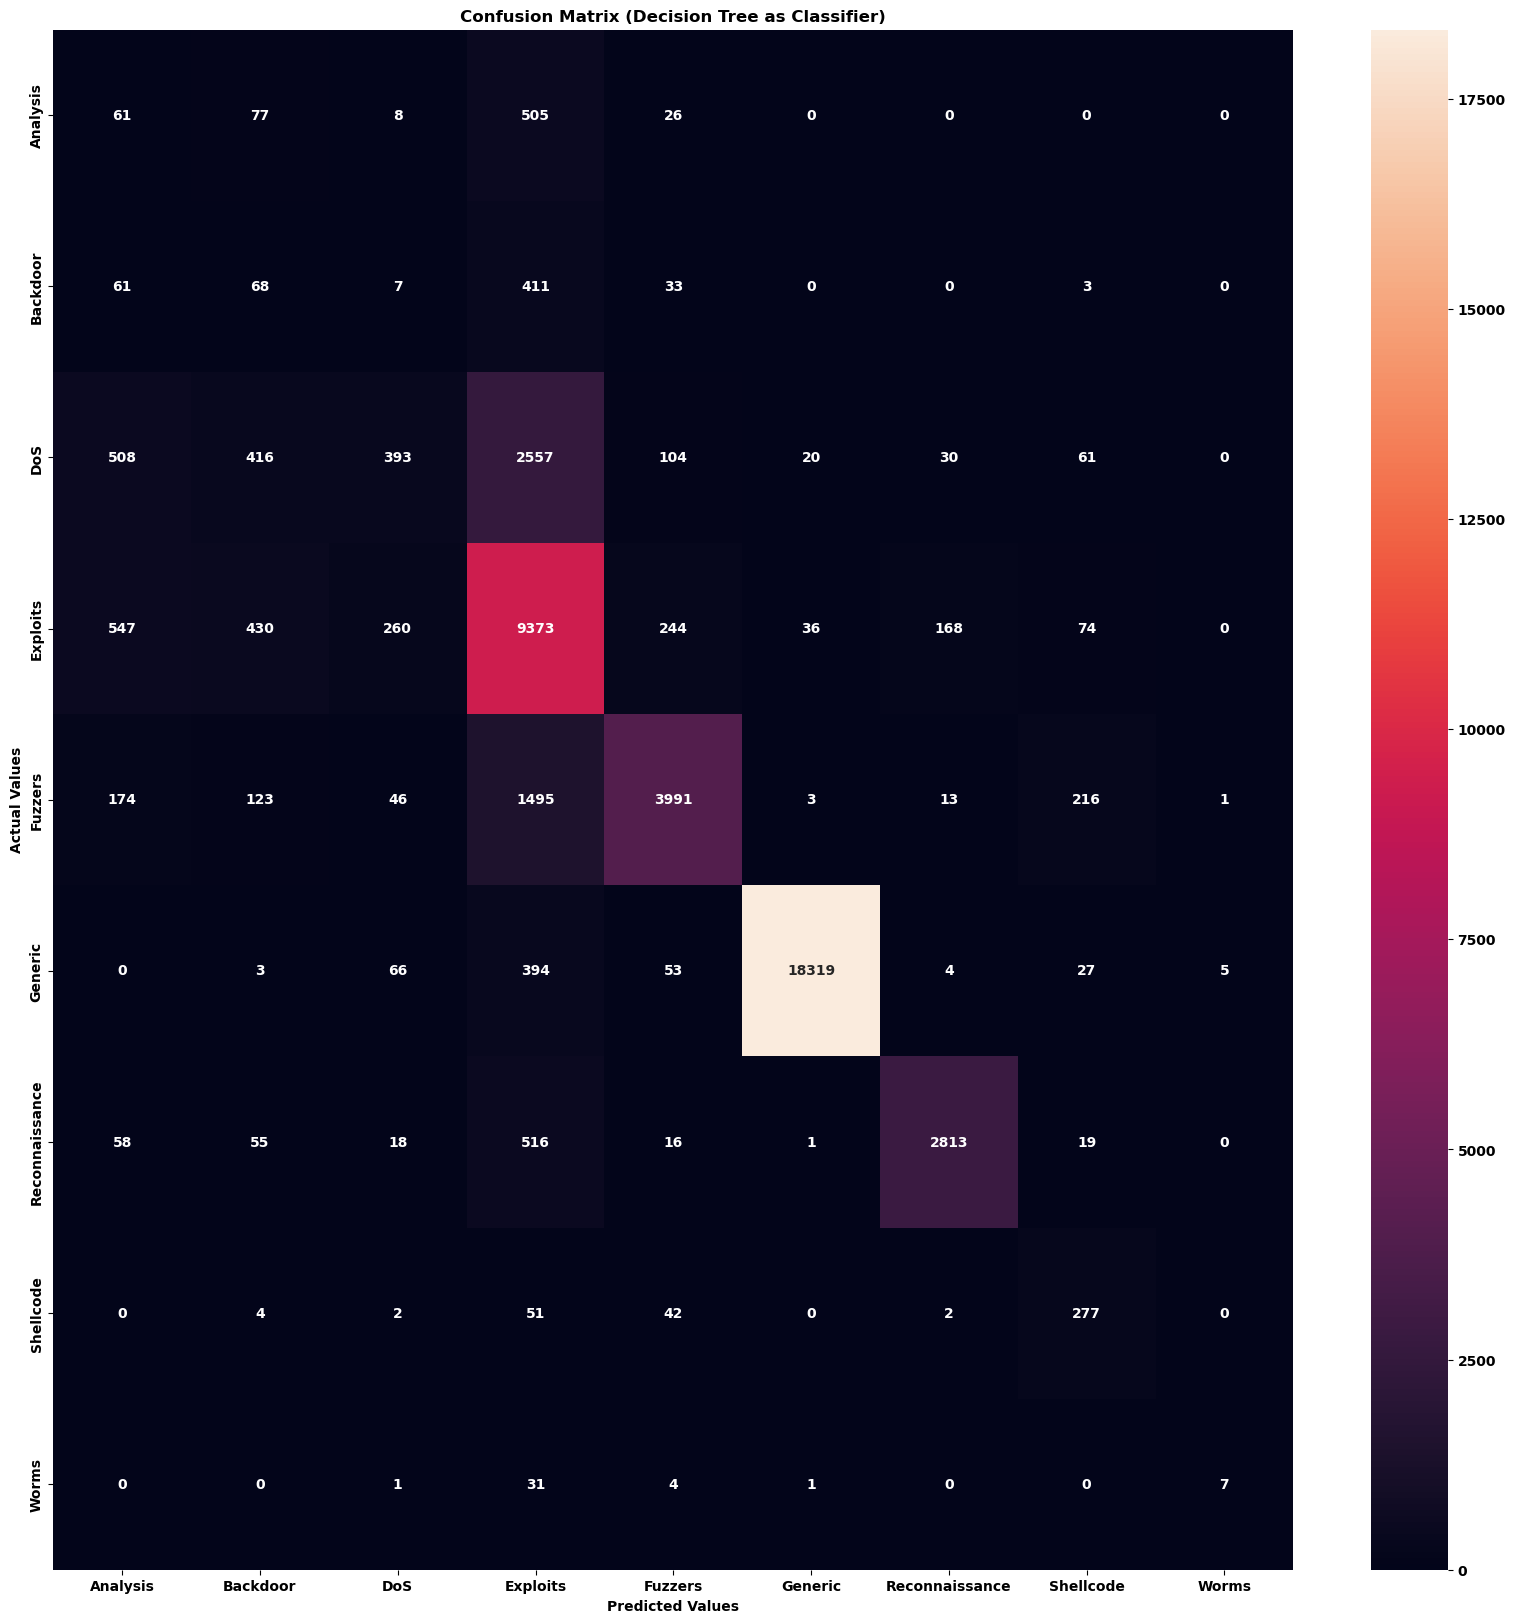

In [71]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [72]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.09010339734121123
Backdoor: 0.11663807890222985
DoS: 0.09611151870873075
Exploits: 0.8419870643190801
Fuzzers: 0.6583635763774331
Generic: 0.970748767950824
Reconnaissance: 0.8046338672768879
Shellcode: 0.7328042328042328
Worms: 0.1590909090909091


### Random Forest

In [73]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

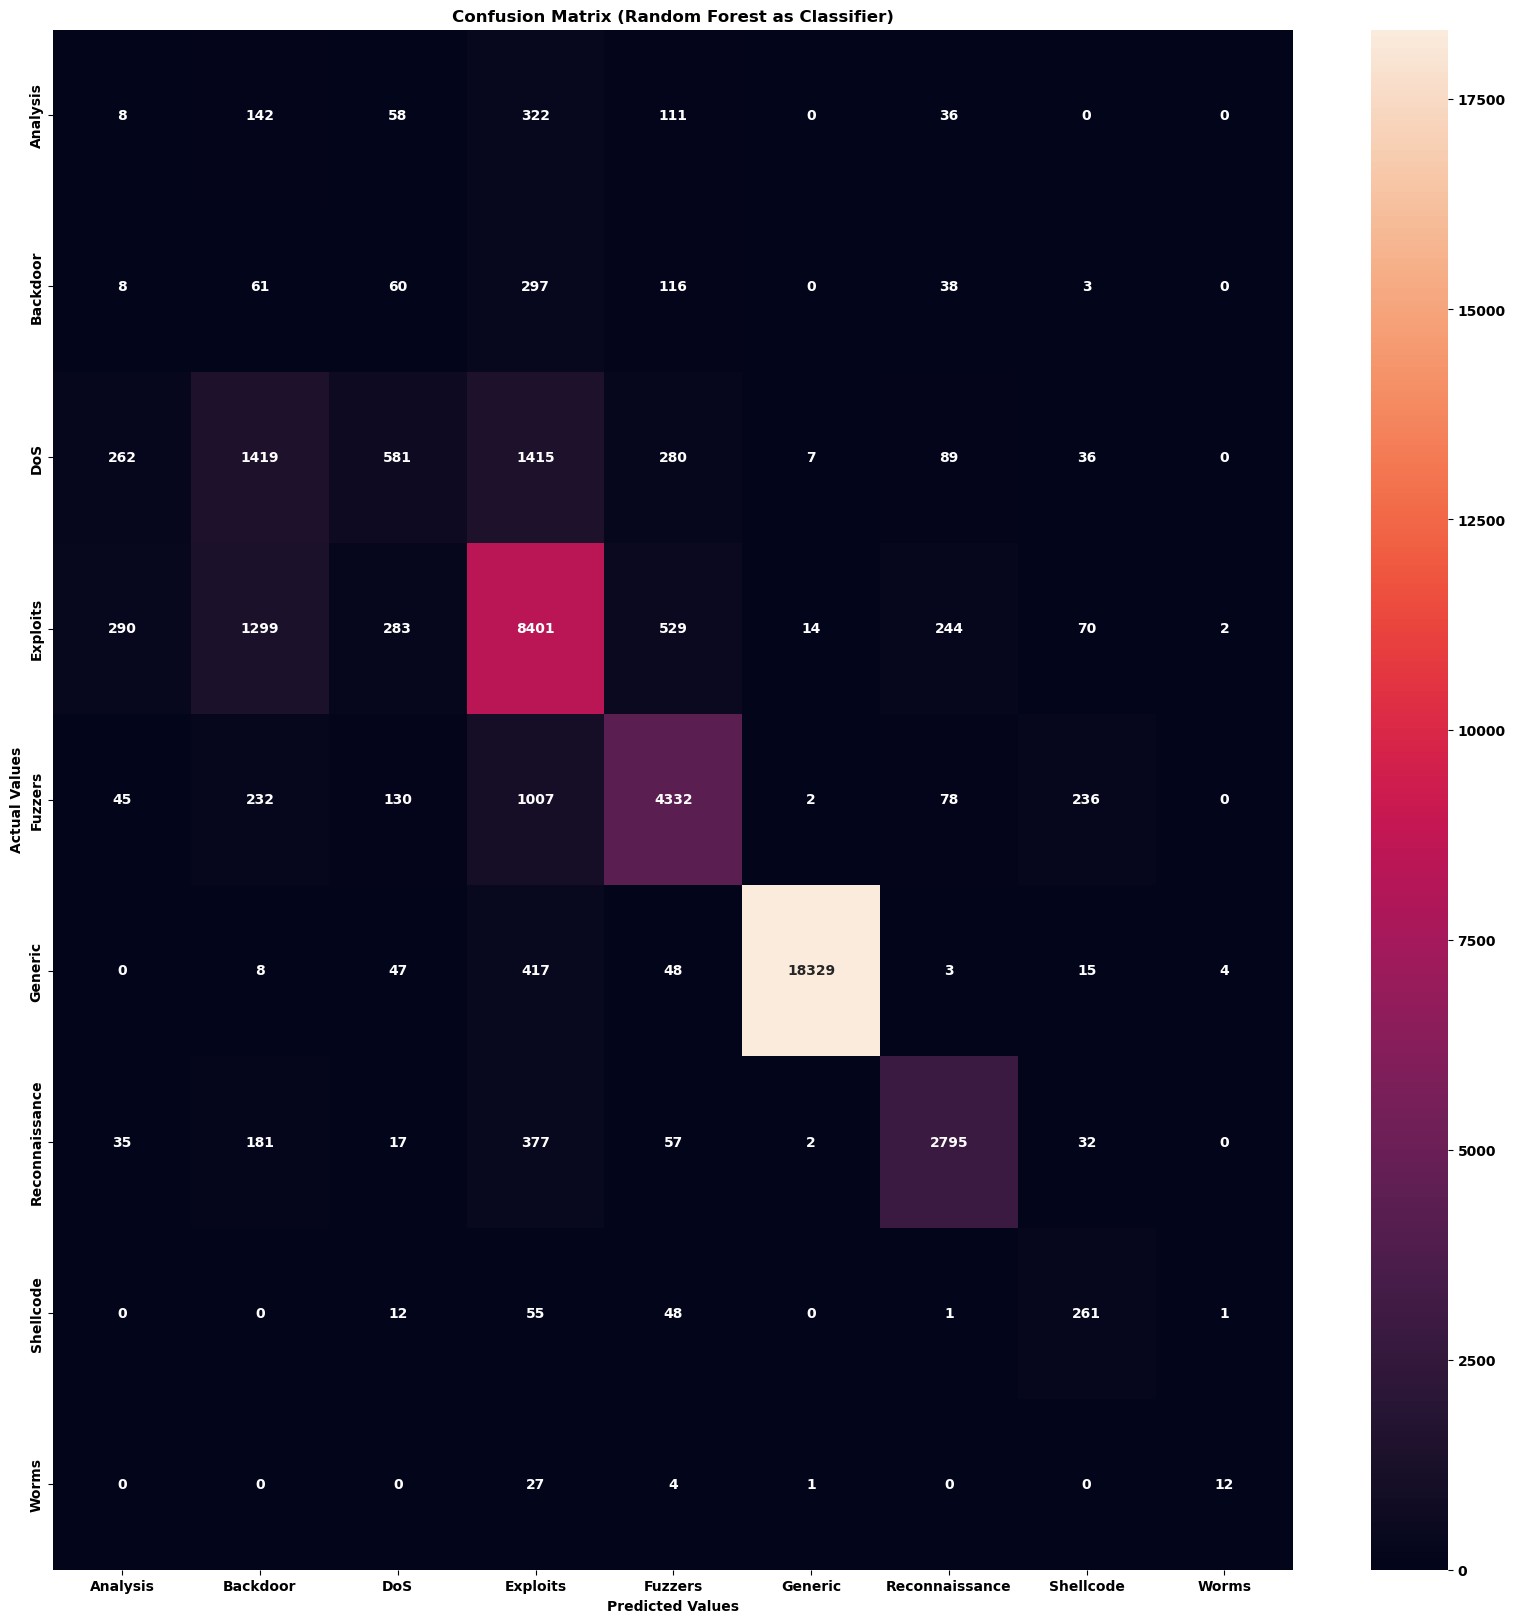

In [74]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [75]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.011816838995568686
Backdoor: 0.10463121783876501
DoS: 0.14208853020298362
Exploits: 0.7546712181099533
Fuzzers: 0.7146156384031672
Generic: 0.9712786815749033
Reconnaissance: 0.7994851258581236
Shellcode: 0.6904761904761905
Worms: 0.2727272727272727


### Gradient Boosting

In [50]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

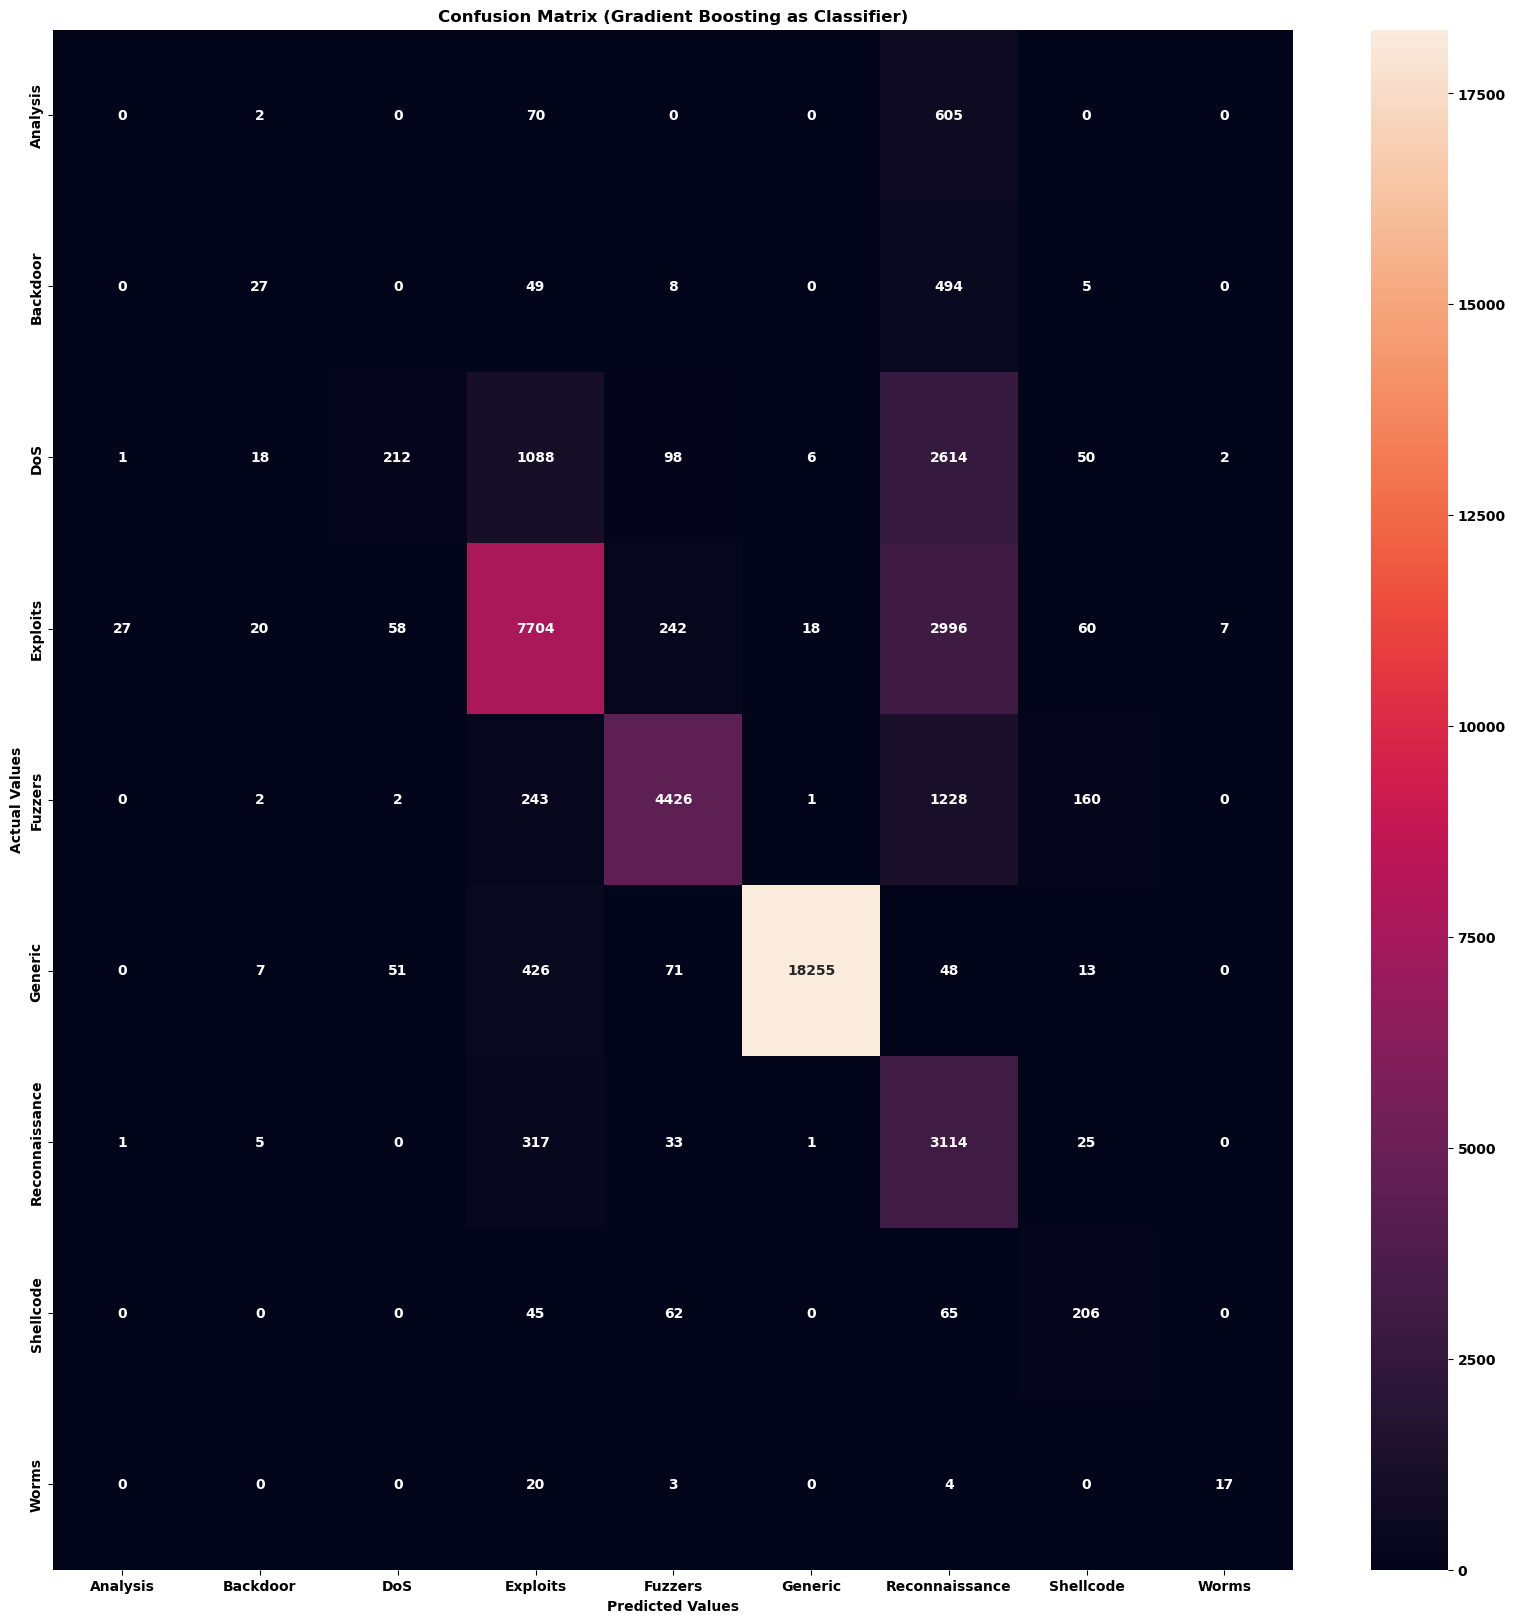

In [51]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [52]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.04631217838765009
DoS: 0.05184641721692345
Exploits: 0.6920589292130794
Fuzzers: 0.7301220719234576
Generic: 0.9673573207567167
Reconnaissance: 0.8907322654462243
Shellcode: 0.544973544973545
Worms: 0.38636363636363635


### XGBoost

In [53]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

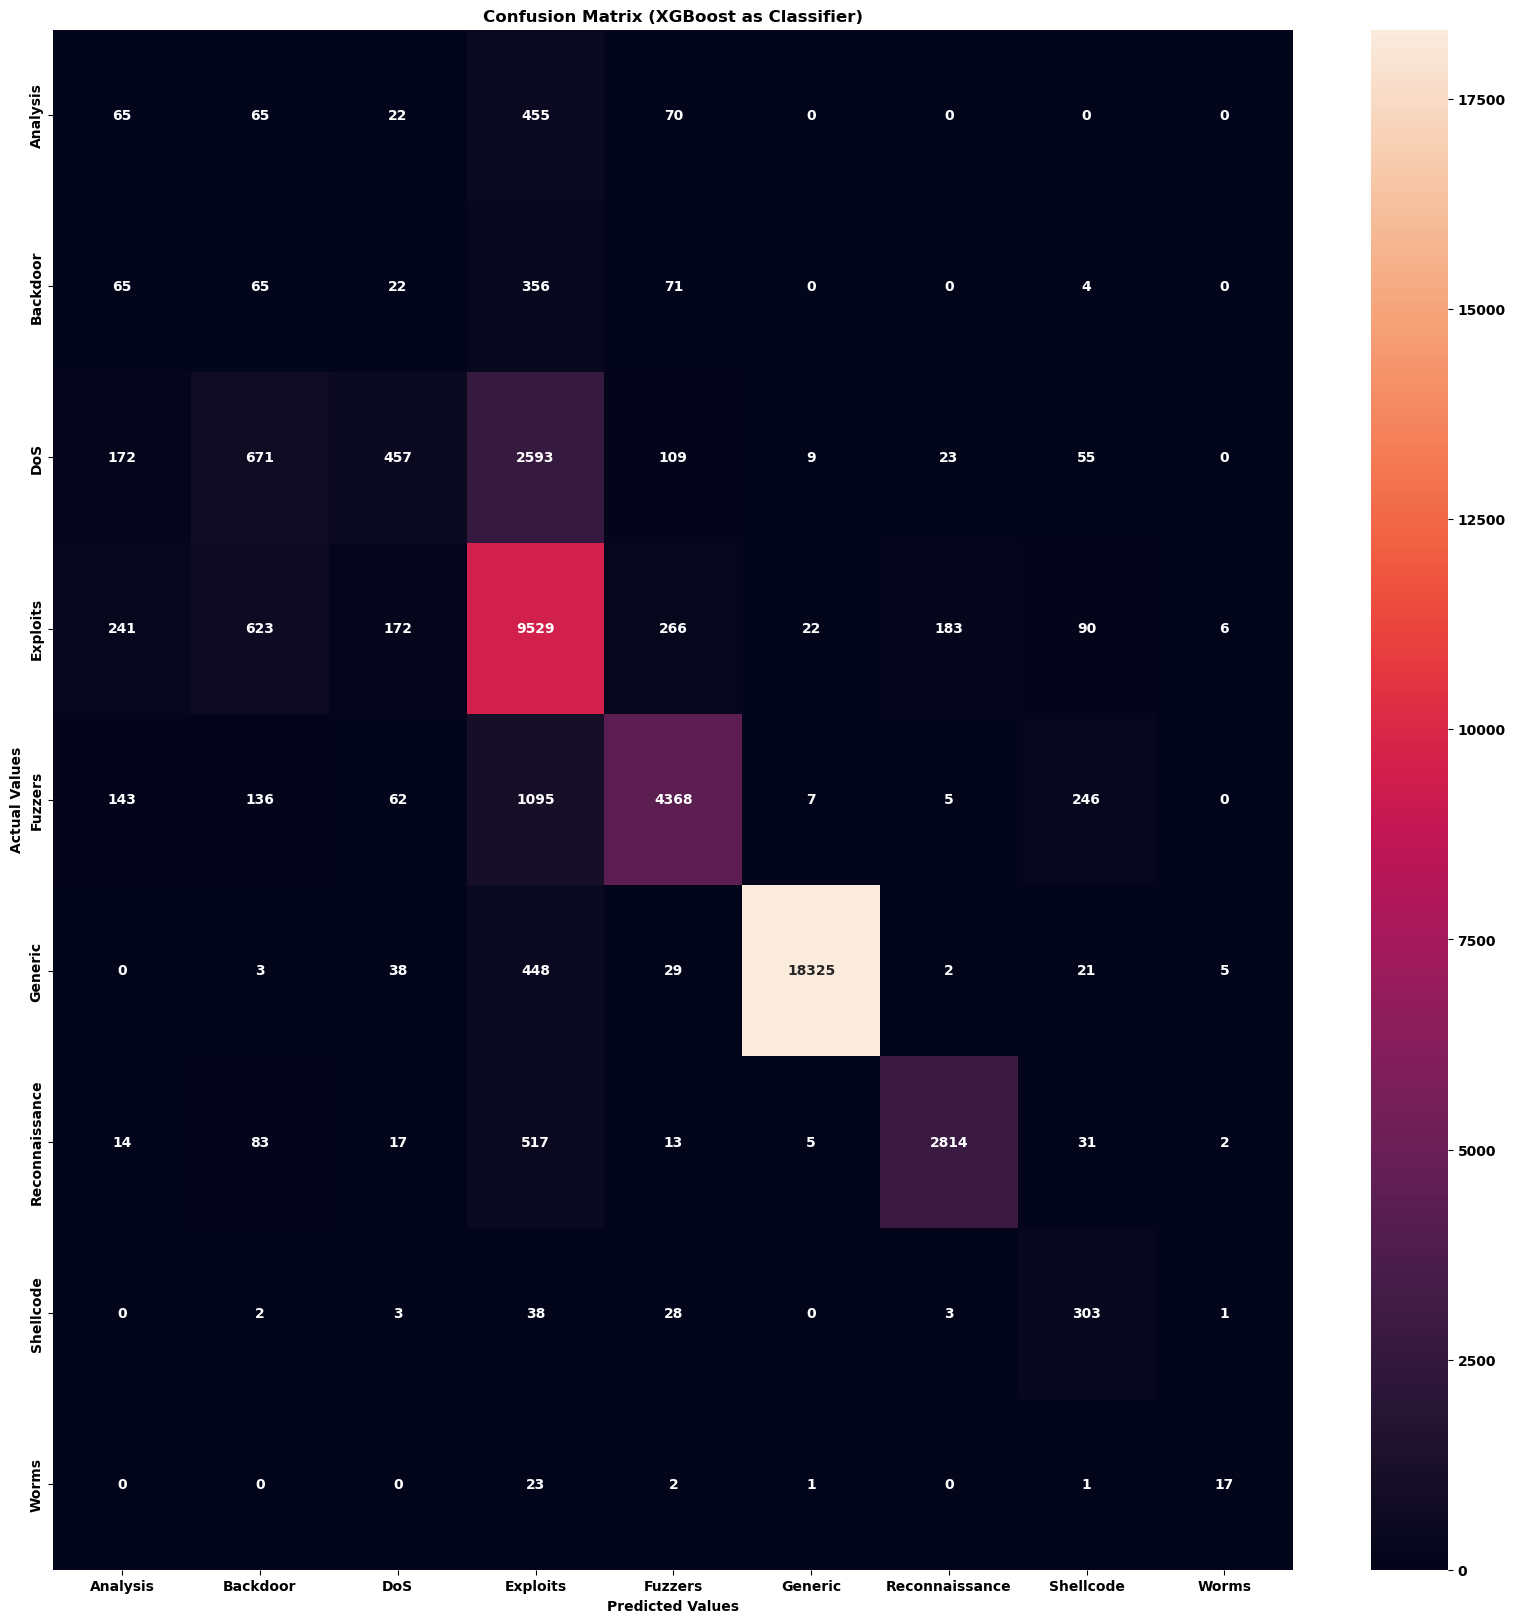

In [54]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.09601181683899557
Backdoor: 0.11149228130360206
DoS: 0.11176326730251895
Exploits: 0.85600071864894
Fuzzers: 0.7205542725173211
Generic: 0.9710667161252716
Reconnaissance: 0.8049199084668193
Shellcode: 0.8015873015873016
Worms: 0.38636363636363635


## Save all model

In [56]:
import pickle

In [57]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/destree.pkl', 'wb') as model_file:
    pickle.dump(destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/ranfor.pkl', 'wb') as model_file:
    pickle.dump(ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/gbc.pkl', 'wb') as model_file:
    pickle.dump(gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/xgb.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

In [60]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/destree.pkl', 'rb') as model_file:
    destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/ranfor.pkl', 'rb') as model_file:
    ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/gbc.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/xgb.pkl', 'rb') as model_file:
    xgb = pickle.load(model_file)

## Save all predicted

In [58]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_destree.pkl', 'wb') as model_file:
    pickle.dump(p_test_destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_ranfor.pkl', 'wb') as model_file:
    pickle.dump(p_test_ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_gbc.pkl', 'wb') as model_file:
    pickle.dump(p_test_gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_xgb.pkl', 'wb') as model_file:
    pickle.dump(p_test_xgb, model_file)

In [59]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_destree.pkl', 'rb') as model_file:
    p_test_destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_ranfor.pkl', 'rb') as model_file:
    p_test_ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_gbc.pkl', 'rb') as model_file:
    p_test_gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_xgb.pkl', 'rb') as model_file:
    p_test_xgb = pickle.load(model_file)